In [1]:
import pandas as pd
import numpy as np
import json 
import math
import collections
import networkx as nx
from matplotlib import pyplot as plt

import scipy


# Networks Analysis

In [2]:
path = '../data/'

In [3]:

with open(path+"info_rw.json",'r') as jf:
    RW = json.load(jf)
    
with open(path+"info_er.json",'r') as jf:
    ER = json.load(jf)
    
with open(path+"info_ba.json",'r') as jf:
    BA = json.load(jf)
    
with open(path+"info_ws.json",'r') as jf:
    WS = json.load(jf)
    
with open(path+"info_cm.json",'r') as jf:
    CM = json.load(jf)

In [4]:
networks = {"Real World":RW,  "Barabási–Albert": BA, "Erdős-Rényi" : ER, "Watts Strogatz":WS, "Configuration Model":CM}


In [5]:
BA.keys()

dict_keys(['name', 'N_nodes', 'N_edges', 'density', 'degrees', 'components', 'avg_shortest_path', 'diameter', 'clusterings', 'average clusterings'])

## Degree distribution analysis


In [6]:
deg_sequences ={k:v['degrees'] for k,v in networks.items()}

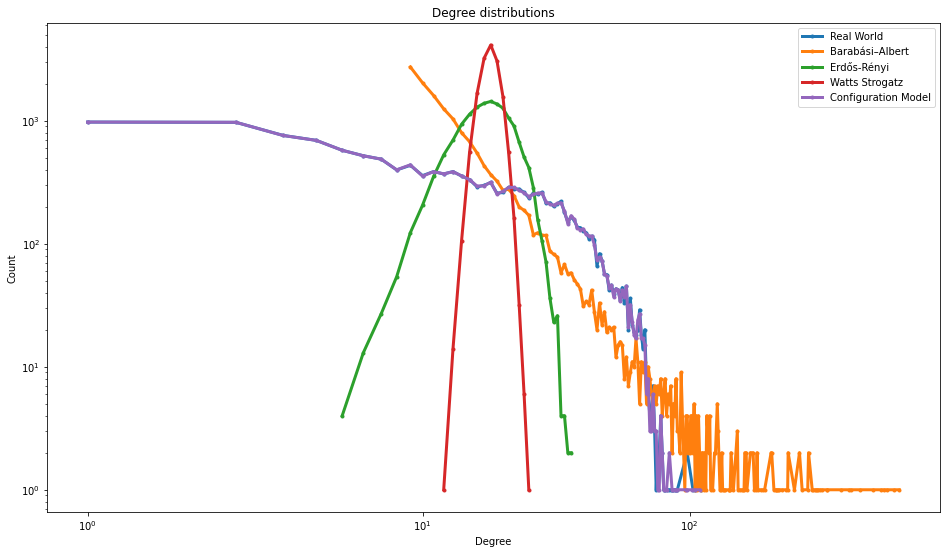

In [7]:

plt.figure(figsize=(16,9))
for name,seq in deg_sequences.items():

    degree_sequence = sorted([c for n,c in seq], reverse=True)  # degree sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())

    plt.plot(deg, cnt,  marker='.', lw=3)


plt.title("Degree distributions")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.xscale('symlog')
plt.yscale('log')
plt.legend([name for name in deg_sequences.keys()])
plt.show()


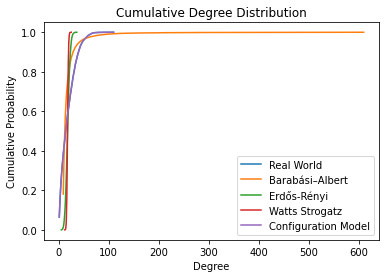

In [20]:

for name, seq in deg_sequences.items():

    degree_sequence = sorted([d for n, d in seq], reverse=True)  # degree sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    normalizer = sum(cnt)
    prob = [i/normalizer for i in cnt]
    cumprob = [0]
    for i, p in enumerate(prob[::-1]):
        cumprob.append(p + cumprob[-1])
    cumprob = cumprob[1:][::-1]
    plt.plot(deg, cumprob, linestyle = '-')


plt.title("Cumulative Degree Distribution")
plt.ylabel("Cumulative Probability")
plt.xlabel("Degree")
plt.legend([name for name in deg_sequences.keys()])
plt.show()

In [195]:
df = pd.DataFrame()
for name,seq in deg_sequences.items():
    ds = sorted([d for n, d in seq], reverse=True)  
    dfd = dict()
    dfd['max']=np.max(ds)
    dfd['min']=np.min(ds)
    dfd['avg'] =np.average(ds)
    dfd['std'] = np.std(ds)
    df = df.append(dfd,ignore_index=True)


df['network'] = [name for name in deg_sequences.keys()]
df.set_index('network', inplace=True, drop=True)   
df


,avg,max,min,std
network,,,,
Real World,18.131724,110.0,1.0,15.357931
Barabási–Albert,17.989255,610.0,9.0,22.226419
Erdős-Rényi,18.183989,36.0,5.0,4.250510
Watts Strogatz,18.000000,25.0,12.0,1.522313
Configuration Model,18.101081,109.0,1.0,15.314245


## Connected components analysis


In [28]:
components =  [c for c in sorted(nx.connected_components(G), key=len, reverse=True)]
avg_size = np.average([len(c) for c in components])
print('average componets size: ', avg_size)
print([len(c) for c in components[:7]],'etc...')

NameError: name 'G' is not defined

## Path analysis


## Clustering Coefficient, Density analysis


In [9]:
clustering_sequences ={k:v['clusterings'] for k,v in networks.items()}

In [10]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

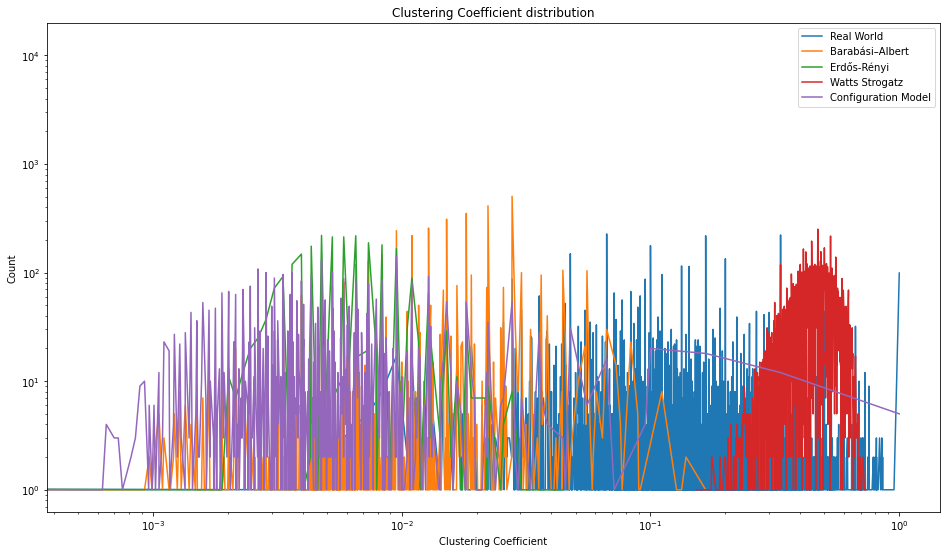

In [15]:
from scipy import interpolate 

plt.figure(figsize = (16,9))
for name,seq in clustering_sequences.items():
    
    clustering_sequence = sorted([c for n,c in seq.items()], reverse=True)  # degree sequence
    degreeCount = collections.Counter(clustering_sequence)
    deg, cnt = zip(*degreeCount.items())
   
    plt.plot(deg, cnt)


plt.title("Clustering Coefficient distribution")
plt.ylabel("Count")
plt.xlabel("Clustering Coefficient")

plt.yscale('log')
plt.xscale('log')
plt.legend([name for name in clustering_sequences.keys()])
plt.show()


In [16]:
deg, cnt = zip(*degreeCount.items())

Real World
0.004761904761904762

Barabási–Albert
0.000725689404934688

Erdős-Rényi
0.0015873015873015873

Watts Strogatz
Configuration Model
0.000546448087431694



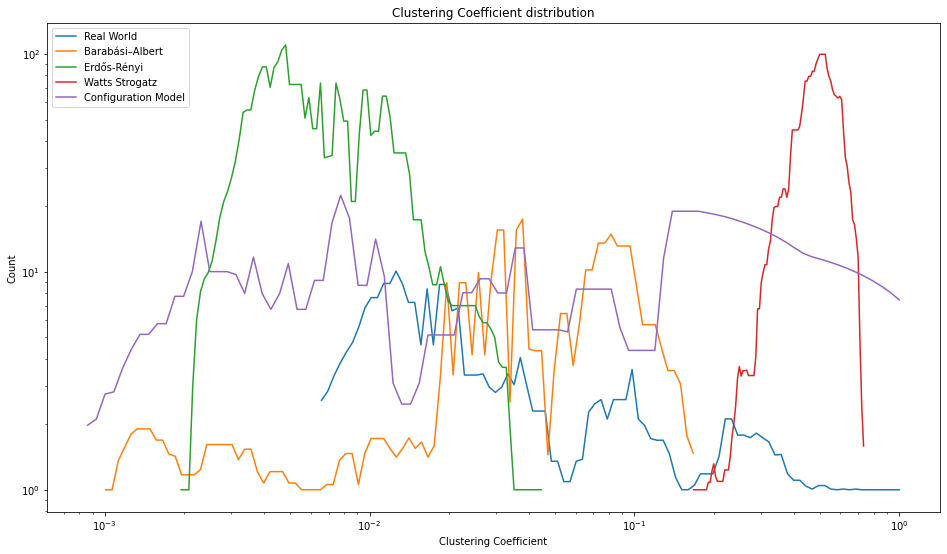

In [17]:
from scipy import interpolate 

plt.figure(figsize = (16,9))
for name,seq in clustering_sequences.items():
    print(name)
    clustering_sequence = sorted([c for n,c in seq.items()], reverse=True)  # degree sequence
    degreeCount = collections.Counter(clustering_sequence)
    deg, cnt = zip(*degreeCount.items())
   
   
    f = interpolate.interp1d(deg,cnt)


    if 0 not in list(deg): 
        deg = np.geomspace(min(deg),max(deg),100)
        cnt = f(deg)

    else: 

        deg = list(deg)[:-1]
        print(min(deg),end='\n\n')
        deg = np.geomspace(min(deg),max(deg),100)
        cnt = f(deg)
    cnt = list(pd.Series(cnt).rolling(window =7, closed = 'both' ).median())
        
    plt.plot(deg, cnt)


plt.title("Clustering Coefficient distribution")
plt.ylabel("Count")
plt.xlabel("Clustering Coefficient")

plt.yscale('log')
plt.xscale('log')
plt.legend([name for name in clustering_sequences.keys()])
plt.show()


In [130]:
clustering_sequences.keys()

dict_keys(['Real World', 'Barabási–Albert', 'Erdős-Rényi', 'Watts Strogatz', 'Configuration Model'])

In [156]:
len(cnt)

3400

15 [0.0, 0.06666666666666667, 0.13333333333333333, 0.2, 0.26666666666666666, 0.3333333333333333, 0.4, 0.4666666666666667, 0.5333333333333333, 0.6, 0.6666666666666666, 0.7333333333333333, 0.8, 0.8666666666666667, 0.9333333333333333, 1] 0.06666666666666667


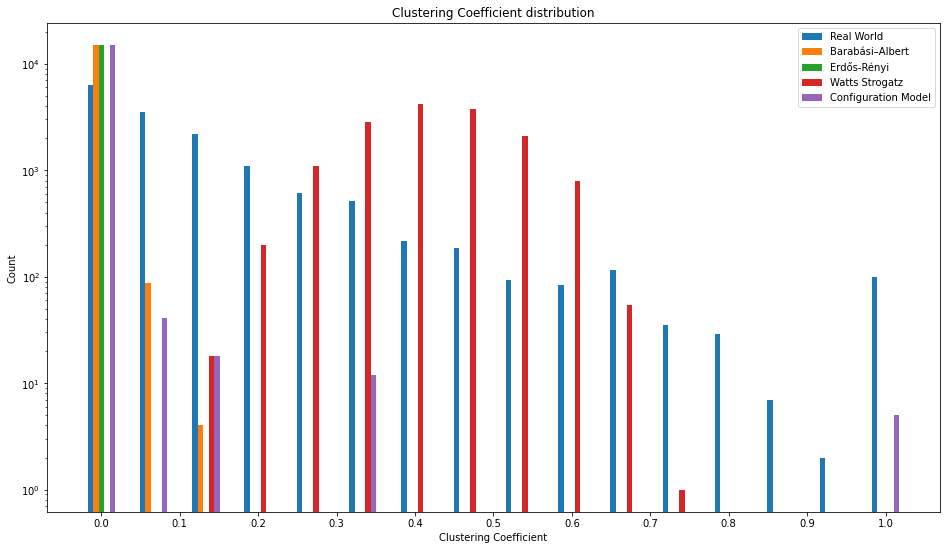

In [186]:
from scipy import interpolate 


k = math.ceil(math.log2(len(clustering_sequences['Real World']))+1) #number o f bins
bins = np.arange(0,1,1/k)
bins = list(bins)
bins.append(1)
print(k, bins,1/k)
width = 0.007
plt.figure(figsize = (16,9))
i= 0
for name,seq in clustering_sequences.items():
    
    clustering_sequence = sorted([c for n,c in seq.items()], reverse=True)  # degree sequence
    bin_indices = np.digitize(clustering_sequence, bins)
    cnt = list(0 for _ in range(len(bins)))
    for bin_id in bin_indices:
        cnt[bin_id-1] += 1
    
    plt.bar(np.array(bins)- width*2+width*i,cnt,width,label=name)
    i+=1

plt.title("Clustering Coefficient distribution")
plt.ylabel("Count")
plt.xlabel("Clustering Coefficient")
plt.xticks([j/10 for j in range(11)])

plt.yscale('log')

plt.legend([name for name in clustering_sequences.keys()])
plt.show()


In [176]:
bins+width*i

TypeError: can only concatenate list (not "float") to list

In [162]:
bin_indices

array([16, 16, 16, ...,  1,  1,  1])

In [131]:
import math 
    
    
    
k = math.log2(len(clustering_sequences['Real World']))+1

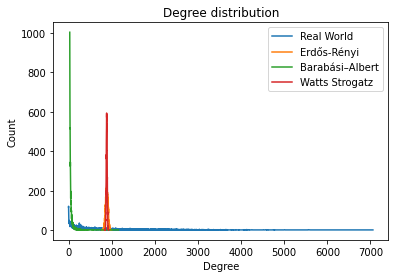

In [50]:
for name,seq in deg_sequences.items():

    degree_sequence = sorted([c for n,c in seq], reverse=True)  # degree sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())

    plt.plot(deg, cnt)


plt.title("Degree distribution")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.legend([name for name in deg_sequences.keys()])
plt.show()


## Centrality analysis

In [53]:
def plot_dist(G):
    M = nx.to_scipy_sparse_matrix(G)
    xmin = min([d[1] for d in G.degree()])
    indegrees = M.sum(0).A[0]
    degree = np.bincount(indegrees)
    fit = powerlaw.Fit(np.array(degree)+1, fit_method='KS')#, xmin=xmin, xmax=max(degree)-xmin,discrete=True)
    
    
    fig = plt.figure(figsize=(16, 6)) 
    """ Plot Distribution """
    plt.subplot(1, 3, 1)
    plt.plot(range(len(degree)),degree,'b.')   
    plt.loglog()
    plt.xlim((min(degree), max(degree)))
    plt.xlabel('Degree')
    plt.ylabel('P(k)')


    """ Plot CDF """
    plt.subplot(1, 3, 2)
    fit.plot_cdf()
    plt.xlabel("Degree")
    plt.ylabel('CDF')

    """ Plot CCDF """
    plt.subplot(1, 3, 3)
    fit.power_law.plot_pdf(color='r',linestyle='--',label='fit ccdf')
    fit.plot_ccdf()
    plt.ylabel('CCDF')
    plt.xlabel('Degree')
    plt.tight_layout()
    plt.show()
    print(f'alpha={fit.power_law.alpha+1} sigma={fit.power_law.sigma}')